#**Load MNIST Image Data and Fit Model**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8466 - loss: 0.4821 - val_accuracy: 0.9818 - val_loss: 0.0550
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9713 - loss: 0.0938 - val_accuracy: 0.9858 - val_loss: 0.0431
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9785 - loss: 0.0683 - val_accuracy: 0.9885 - val_loss: 0.0352
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9909 - val_loss: 0.0284
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9870 - loss: 0.0454 - val_accuracy: 0.9902 - val_loss: 0.0298
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0332 - val_accuracy: 0.99

#**Load LIME and Explain Predictions**

In [3]:
try:
  import lime
  from lime import lime_image
except ImportError as error:
  !pip install lime
  import lime
  from lime import lime_image

import random
import numpy as np

predictions = model.predict(x_test)
print(predictions)

# The LIME ImageExplainer expects color images (3 channels)
# We have grayscale here, so we need to make the images 'look' like RGB (replicating the grayscale values three times) so Lime will work with them.
def to_rgb(images):
    images_rgb = np.zeros((images.shape[0], images.shape[1], images.shape[2], 3))
    for i in range(3):
        images_rgb[..., i] = images[..., 0]
    return images_rgb

x_train_rgb = to_rgb(x_train)
x_test_rgb = to_rgb(x_test)

# We thus now also need to wrap the prediction function, to convert those 3-channel images back to 1 channel.
def new_predict(images):
  images = images[:,:,:,0].reshape(images.shape[0],images.shape[1],images.shape[2],1)
  predictions = model.predict(images)
  return predictions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=23b31546d1824332656b12779e601755dcd41021a2aff3ff5c752a5d9358a409
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[7.8233741e-18 1.2037912e-12 1.6952825e-11 ... 1.0000000e+00
  6.8580761e-14 5.5285698e-10]
 [9.2900145e-13 1.8456312e-08 1.0000000e+00 ... 5.2719171e-14
  1.1370585e-15 4.2572837e-15]
 [5.2399508e-11 9.9999905e-01 9.4559283e-08 ... 3.1667065e-07
  4.0077097e-09 6.5708271e-08]
 ...
 [1.2871381e-17 4.8091139e-11 3.7181748e-14 ... 5.6402056e-13
  9.6434492e-12 3.8864103e-09]
 [2.0465121e-15 6.9773644e-18 6.7302336e-20 ... 1.3040412e-16
  3.8897401e-09 3.3767032e-15]
 [2.4946488e-12 3.0924360e-16 1.3615327e-11 ... 9.4266082e-18
  3.3935327e-13 2.6278752

Now we can visualize the explanation... this is obviously a pretty basic result - the model learns that raising the pixel values to the right of the two will increase the probability that it gets labeled a 2, where as increasing the pixel values on the left will decrease the probability its labeled a 2.

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

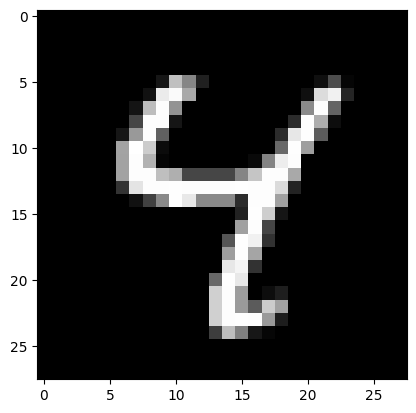

In [4]:
try:
  from skimage.segmentation import mark_boundaries
except ImportError as error:
  !pip install skimage
  from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Instantiate our LIME explainer.
explainer = lime_image.LimeImageExplainer()

# Now use it to 'explain' the first test image.
explanation = explainer.explain_instance(x_test_rgb[6], new_predict, num_samples=1000, top_labels=10, hide_color=1)

print(f'The rank ordering of most probable labels for this image is as follows: {explanation.top_labels}.')

plt.imshow(x_test_rgb[6])
plt.show()

Now we can plot the super-pixels lime identified (boundaries are in yellow), and how they relate to the final prediction for each outcome class (the super-pixels it ends up considering are quite large, generally partitions of the original image). Gree means that super-pixel contributed positively to the label prediction, and red means it contributes negatively. That is, if you increase pixel values in that region, the associated label's prediction in the softmax gets larger for this image.

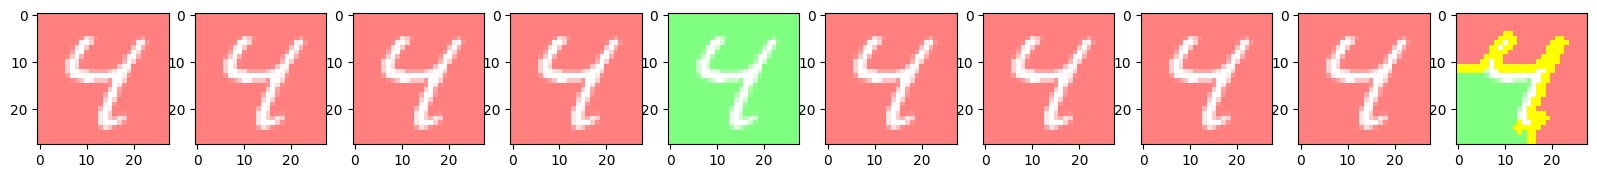

In [5]:
figure, axes = plt.subplots(nrows=1, ncols=10)

for i in range(10):
    # Get the 'temperature', i.e., the marginal effect of pixels, relative to each outcome label (there are 10)
    label = explanation.top_labels[i]
    # positive_only = True means we only display pixels that contributed positively to the respective label. Notice for most labels, the pixel contributions are basically 0.
    temp, mask = explanation.get_image_and_mask(label, positive_only=False, hide_rest=False)
    # Add a plot for the associated label
    axes[label].imshow(mark_boundaries(temp / 2 + 0.5, mask))

figure.set_figheight(20)
figure.set_figwidth(20)